In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

better logic in count Vectorizer 

In [2]:
# reading data from text files
with open("SMSSpamCollection.txt","r") as file:
    data=file.read()

In [3]:
temp=data.split("\n")

In [4]:
print("No. of Emails:",len(temp))

No. of Emails: 5575


In [5]:
x=[]
y=[]
for email_with_label in temp:
    temp_emails=email_with_label.split("\t")
    if len(temp_emails)==2:
        x.append(temp_emails[1])
        y.append(temp_emails[0])

In [6]:
len(x),len(y)

(5574, 5574)

In [7]:
#dataframe
dt={"email_message":x,"label":y}
email_data=pd.DataFrame(dt)
email_data.head()

,email_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [8]:
# df2 = pd.read_table('SMSSpamCollection.txt',header=None)
# df2.columns = ['label','email_message']
# df2.head()

In [9]:
# data is imbalance or not
email_data["label"].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [10]:
spam=email_data[email_data["label"]=="spam"]
ham=email_data[email_data["label"]=="ham"]


In [11]:
ham.sample(1000)  #randomly selected 1000 records

,email_message,label
4294,You best watch what you say cause I get drunk ...,ham
1258,Am also doing in cbe only. But have to pay.,ham
4313,I keep ten rs in my shelf:) buy two egg.,ham
5357,Living is very simple.. Loving is also simple....,ham
2005,"Goodmorning, today i am late for &lt;DECIMAL&...",ham
...,...,...
3594,"Sorry, I'll call later",ham
4983,Slept? I thinkThis time ( &lt;#&gt; pm) is no...,ham
2299,Dont pick up d call when something important i...,ham
4957,Ahhhh...just woken up!had a bad dream about u ...,ham


In [12]:
ham=ham.sample(1000)

In [13]:
spam.shape,ham.shape

((747, 2), (1000, 2))

In [14]:
final_df=pd.concat([spam,ham],axis=0)

In [15]:
final_df.isnull().sum()

email_message    0
label            0
dtype: int64

In [16]:
final_df.shape

(1747, 2)

In [17]:
# Text cleaning
import re
final_df["email_message"]

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
3986             Whatever, juliana. Do whatever you want.
1438    Wat so late still early mah. Or we juz go 4 di...
908     I.ll give her once i have it. Plus she said gr...
1092    Please da call me any mistake from my side sor...
3135              Ok going to sleep. Hope i can meet her.
Name: email_message, Length: 1747, dtype: object

In [18]:
final_df.reset_index(drop=True,inplace=True)

In [19]:
final_df["email_message"][25]
# a-z,A-Z

"FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per msg reply Stop to end"

In [20]:
final_df

,email_message,label
0,Free entry in 2 a wkly comp to win FA Cup fina...,spam
1,FreeMsg Hey there darling it's been 3 week's n...,spam
2,WINNER!! As a valued network customer you have...,spam
3,Had your mobile 11 months or more? U R entitle...,spam
4,"SIX chances to win CASH! From 100 to 20,000 po...",spam
...,...,...
1742,"Whatever, juliana. Do whatever you want.",ham
1743,Wat so late still early mah. Or we juz go 4 di...,ham
1744,I.ll give her once i have it. Plus she said gr...,ham
1745,Please da call me any mistake from my side sor...,ham


In [21]:
re.sub("[^a-zA-Z]","",final_df["email_message"][25]).lower()

'freemsgwhyhaventyourepliedtomytextimrandysexyfemaleandlivelocalluvtohearfromunetcollexltdppermsgreplystoptoend'

In [22]:
for i in range(len(final_df)):
    final_df["email_message"][i]=re.sub("[^a-zA-Z]","",final_df["email_message"][i]).lower()

C:\Users\Pragati\AppData\Local\Temp\ipykernel_17644\1806119197.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  final_df["email_message"][i]=re.sub("[^a-zA-Z]","",final_df["email_message"][i]).lower()


In [23]:
final_df.head()

,email_message,label
0,freeentryinawklycomptowinfacupfinaltktsstmayte...,spam
1,freemsgheytheredarlingitsbeenweeksnowandnoword...,spam
2,winnerasavaluednetworkcustomeryouhavebeenselec...,spam
3,hadyourmobilemonthsormoreurentitledtoupdatetot...,spam
4,sixchancestowincashfromtopoundstxtcshandsendto...,spam


In [24]:
final_df['label'] = final_df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [25]:
final_df

,email_message,label
0,freeentryinawklycomptowinfacupfinaltktsstmayte...,1
1,freemsgheytheredarlingitsbeenweeksnowandnoword...,1
2,winnerasavaluednetworkcustomeryouhavebeenselec...,1
3,hadyourmobilemonthsormoreurentitledtoupdatetot...,1
4,sixchancestowincashfromtopoundstxtcshandsendto...,1
...,...,...
1742,whateverjulianadowhateveryouwant,0
1743,watsolatestillearlymahorwejuzgodinnerloraiyaid...,0
1744,illgiveheronceihaveitplusshesaidgrinulegreetyo...,0
1745,pleasedacallmeanymistakefrommysidesorrydaplsda...,0


INDEPENDENT
DEPENDENT

In [26]:
x=final_df["email_message"]
y=final_df["label"]

In [27]:
type(x)

pandas.core.series.Series

In [28]:
X=x.values

In [29]:
# bow_obj=CountVectorizer()

In [30]:
bow_obj=CountVectorizer(max_features=1500,stop_words="english")

In [31]:
X=bow_obj.fit_transform(x)

In [32]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1681 stored elements and shape (1747, 1500)>

In [33]:
# sparse matrix
# dense matrix


In [34]:
# assignment research on output of x
X=X.toarray() 

In [35]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1742    0
1743    0
1744    0
1745    0
1746    0
Name: label, Length: 1747, dtype: int64

In [37]:
X.shape,y.shape

((1747, 1500), (1747,))

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [40]:
x.shape

(1747,)

Text classification

In [41]:
# algorithm to perform classification 
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
# class more than two but in limited or discreate Multinomial
# class unlimited use Bernoulli

In [43]:
bnb=BernoulliNB()
GNb=GaussianNB()
mnb=MultinomialNB()

In [44]:
# training algorithm
bnb.fit(x_train,y_train)
print("BernoulliNB Train")
GNb.fit(x_train,y_train)
print("GaussianNB train")
mnb.fit(x_train,y_train)
print("MultinomialNB train")

BernoulliNB Train
GaussianNB train
MultinomialNB train


In [45]:
print("MultinomialNB Training score : ",mnb.score(x_train,y_train))
print("MultinomialNB Testing score : ",mnb.score(x_test,y_test))

print()

print("BernoulliNB Training score : ",bnb.score(x_train,y_train))
print("BernoulliNB Testing score : ",bnb.score(x_test,y_test))

print()

print("GaussianNB Training score : ",GNb.score(x_train,y_train))
print("GaussianNB Testing score : ",GNb.score(x_test,y_test))

MultinomialNB Training score :  0.9845013477088949
MultinomialNB Testing score :  0.7680608365019012

BernoulliNB Training score :  0.9845013477088949
BernoulliNB Testing score :  0.7680608365019012

GaussianNB Training score :  0.9757412398921833
GaussianNB Testing score :  0.42585551330798477


In [46]:
# Prediction
x_test.shape

(263, 1500)

In [47]:
prediction=mnb.predict(x_test)

In [48]:
y_test

1041    0
1228    0
1648    0
551     1
243     1
       ..
1598    0
1046    0
1169    0
399     1
85      1
Name: label, Length: 263, dtype: int64

In [49]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
pred=list(prediction)
actual=list(y_test)
comparison_df=pd.DataFrame({"Actual":actual,"Prediction":pred})
comparison_df.head(40)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1
5,0,0
6,1,0
7,0,0
8,1,0
9,0,0


In [51]:
from sklearn.metrics import confusion_matrix,classification_report
matrix=confusion_matrix(comparison_df["Actual"],comparison_df["Prediction"])
matrix

array([[154,   0],
       [ 61,  48]])

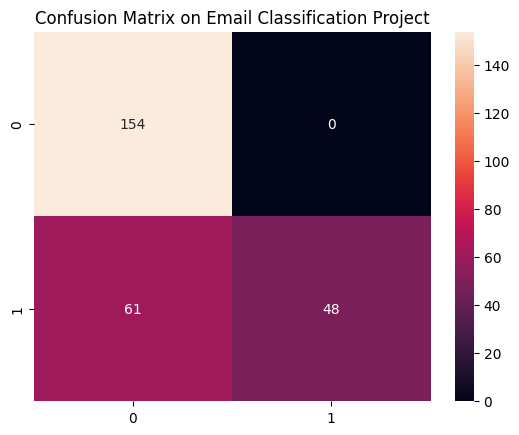

In [52]:
sns.heatmap(matrix,annot=True,fmt="d")
plt.title("Confusion Matrix on Email Classification Project")
plt.show()

In [53]:
print(classification_report(comparison_df["Actual"],comparison_df["Prediction"]))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83       154
           1       1.00      0.44      0.61       109

    accuracy                           0.77       263
   macro avg       0.86      0.72      0.72       263
weighted avg       0.83      0.77      0.74       263



In [54]:
import os,joblib

In [56]:
os.makedirs("models",exist_ok=True)

In [57]:
# 
joblib.dump(bnb,"./models/bernouliNB.lb")
joblib.dump(GNb,"./models/gaussianNB.lb")
joblib.dump(mnb,"./models/multinomialNB.lb")

['./models/multinomialNB.lb']

In [58]:
joblib.dump(bow_obj,"./models/bag_of_words.lb")

['./models/bag_of_words.lb']

In [ ]:
# practice

In [ ]:
import numpy as np

In [ ]:
arr =np.random.randint(1,999,250)
arr

array([737,  47, 982, 450,  76, 501, 815,  65,  31, 758, 406, 298, 879,
       218, 996, 510, 475, 702, 503, 591, 671, 243, 114, 499, 628, 145,
       486, 746, 706, 354, 308, 637, 586, 228,  42,  81, 798, 612, 949,
       942, 277, 421, 775, 147, 769, 592,  59, 469,  82, 722,  81, 800,
       793, 873, 114, 269, 339, 836, 601, 483, 311, 429, 218, 425, 422,
       633, 690, 527, 881, 829, 750, 134, 517, 797, 333, 279, 667, 761,
       404, 761, 283, 906, 281, 151, 844, 247, 610, 898, 389, 426, 158,
       934, 382,  82, 312, 518, 600,  18, 163, 133, 765, 130, 978, 413,
       110, 179, 722, 728, 121,  46, 151, 240, 276, 160, 913, 357, 855,
       678, 993, 343, 900, 746, 837, 440, 667, 848, 799, 323, 646, 700,
       729, 682, 338, 439, 870,  69, 745, 698, 162, 606, 937,  52, 922,
       113, 687, 908, 718,  17, 118,  35, 675, 483, 365, 739, 822, 686,
       603, 423, 297, 265, 833, 455, 765, 684, 199, 582, 910, 335,  44,
        21, 694, 647, 489, 757, 476, 622, 423, 547, 796,  54, 15

In [ ]:
labels = arr['label']
temp_labels = [1 if item =="even" else 0 for item in labels]
arr['label'] = temp_labels

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
labels = list(final_df['label'])
temp_labels = [1 if item =="spam" else 0 for item in labels]
final_df['label'] = temp_labels

In [ ]:
final_df.head()

,email_message,label
0,freeentryinawklycomptowinfacupfinaltktsstmayte...,1
1,freemsgheytheredarlingitsbeenweeksnowandnoword...,1
2,winnerasavaluednetworkcustomeryouhavebeenselec...,1
3,hadyourmobilemonthsormoreurentitledtoupdatetot...,1
4,sixchancestowincashfromtopoundstxtcshandsendto...,1


list comprehension

In [ ]:
list=[2,4,6,8,9,5,6,4]
square=[]
for item in list:
    square.append(item**2)

print(square)

[4, 16, 36, 64, 81, 25, 36, 16]


In [ ]:
[item **2 for item in list]

[4, 16, 36, 64, 81, 25, 36, 16]

In [ ]:
# list comprehension
# [1 if item =="spam" else 0 for item in label]